正在处理文件: baicu.data
增强后的数据形状: (41256, 4)


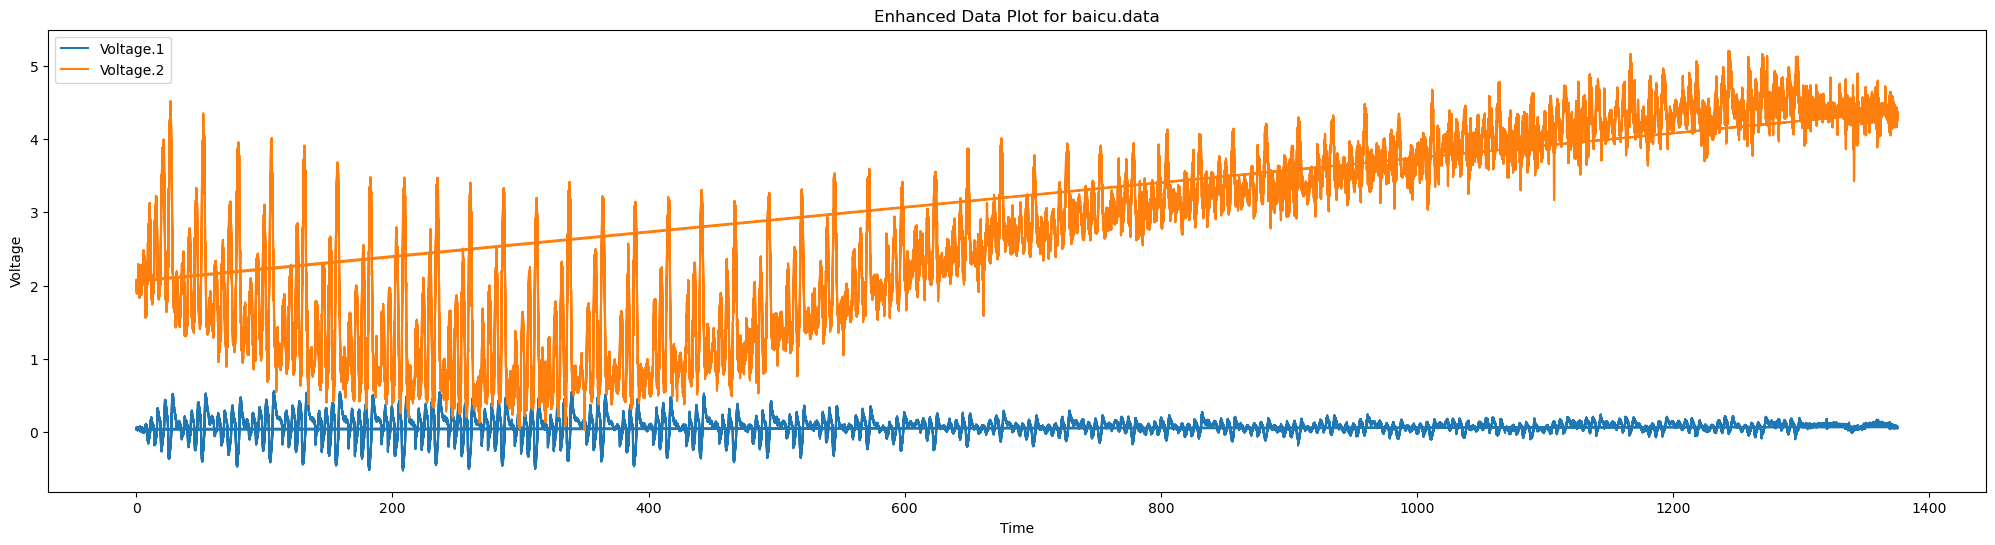

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: baijiu.data
增强后的数据形状: (44373, 4)


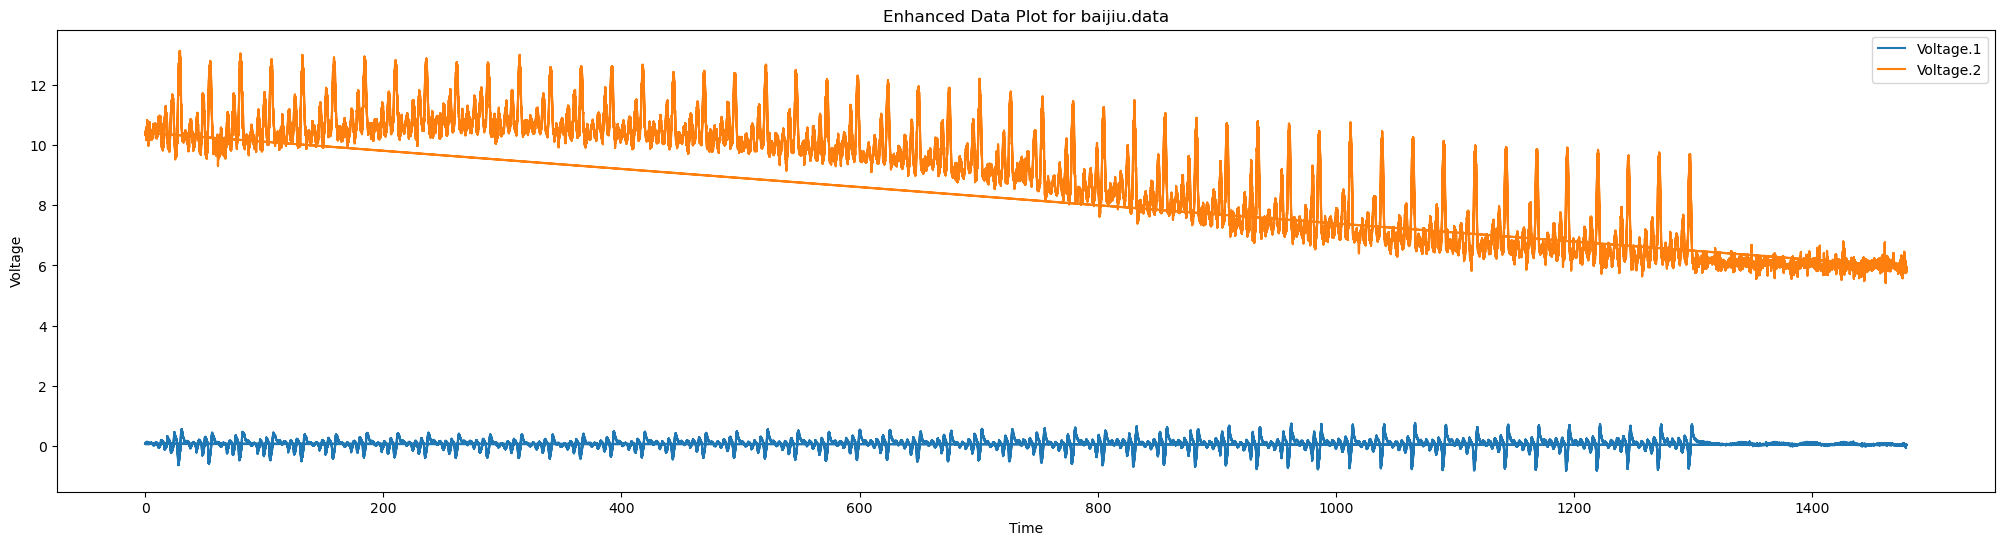

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: cd50.data
增强后的数据形状: (41757, 4)


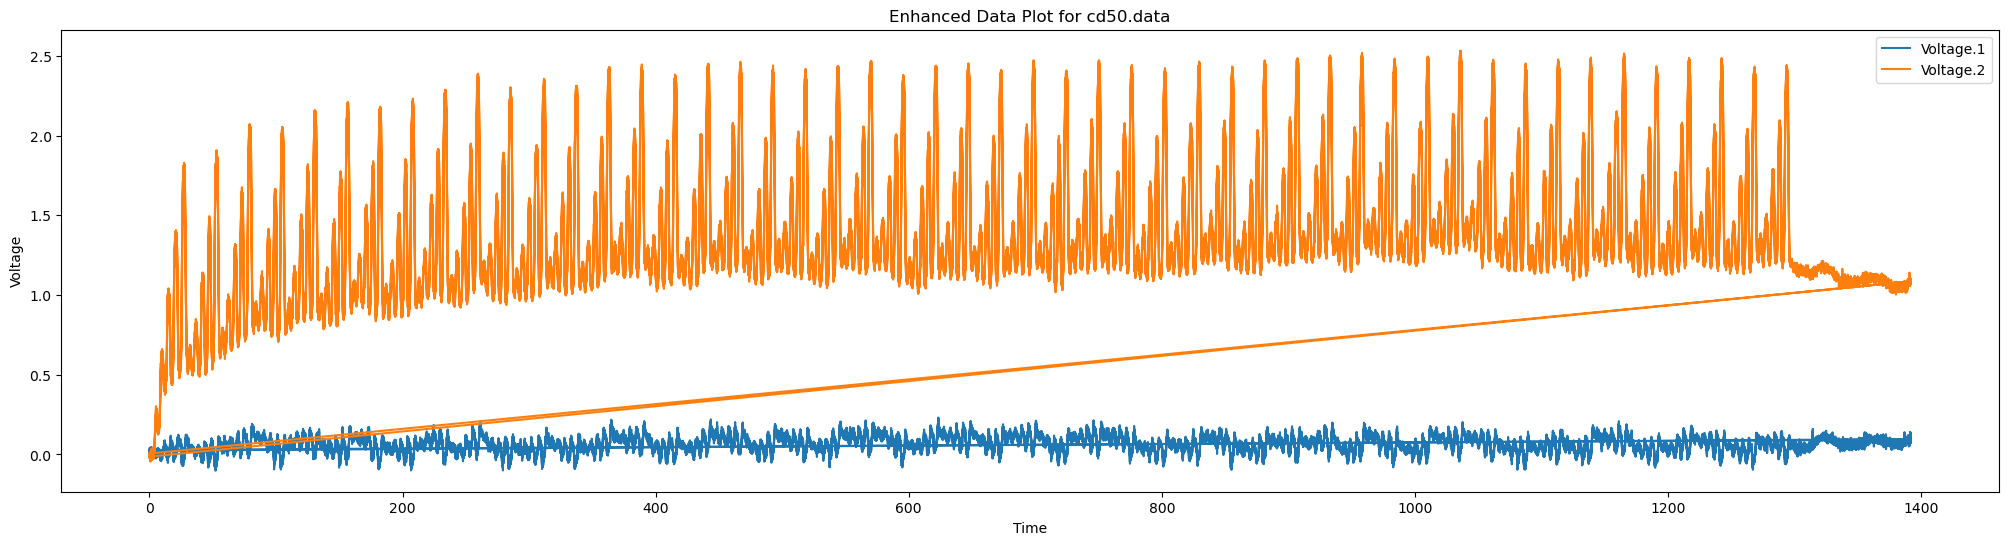

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: cu60.data
增强后的数据形状: (52845, 4)


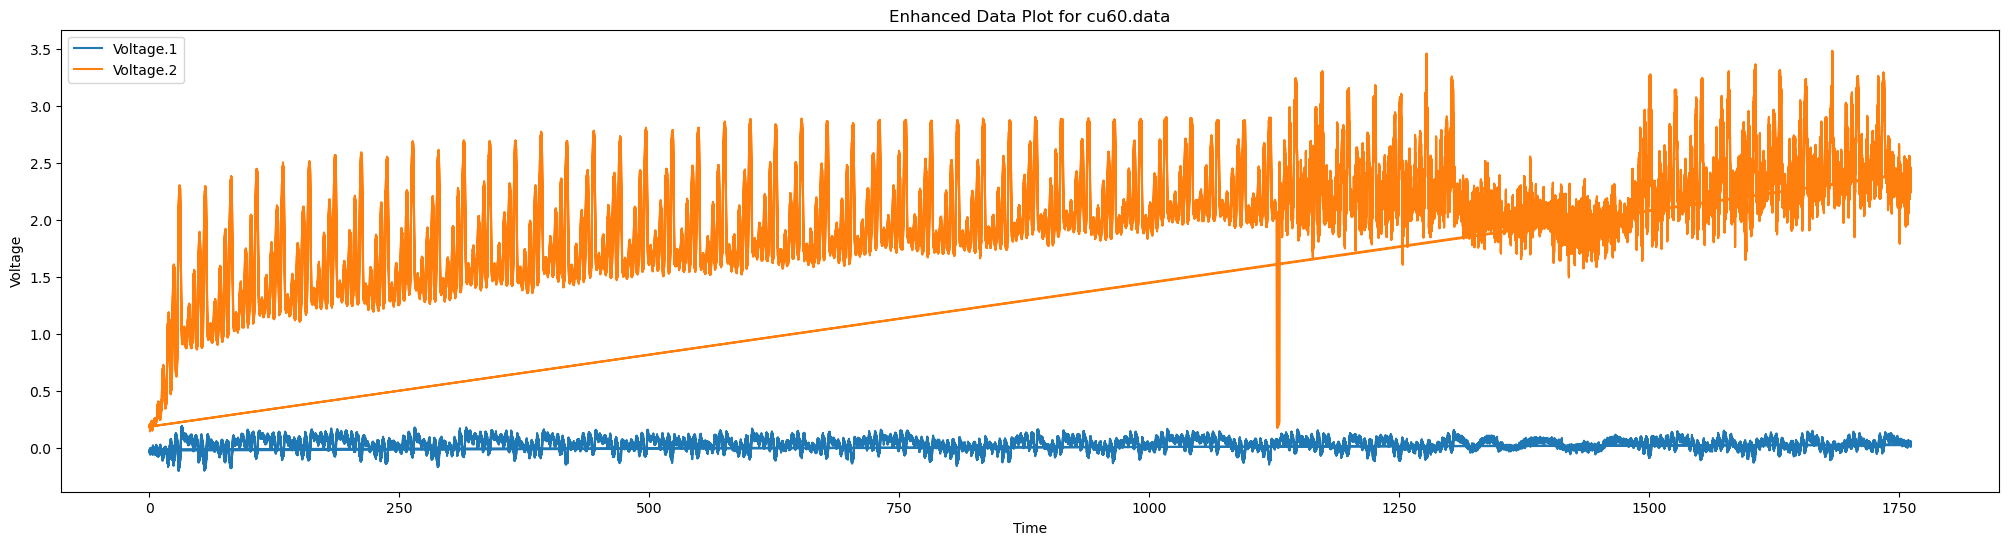

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: di60.data
增强后的数据形状: (48795, 4)


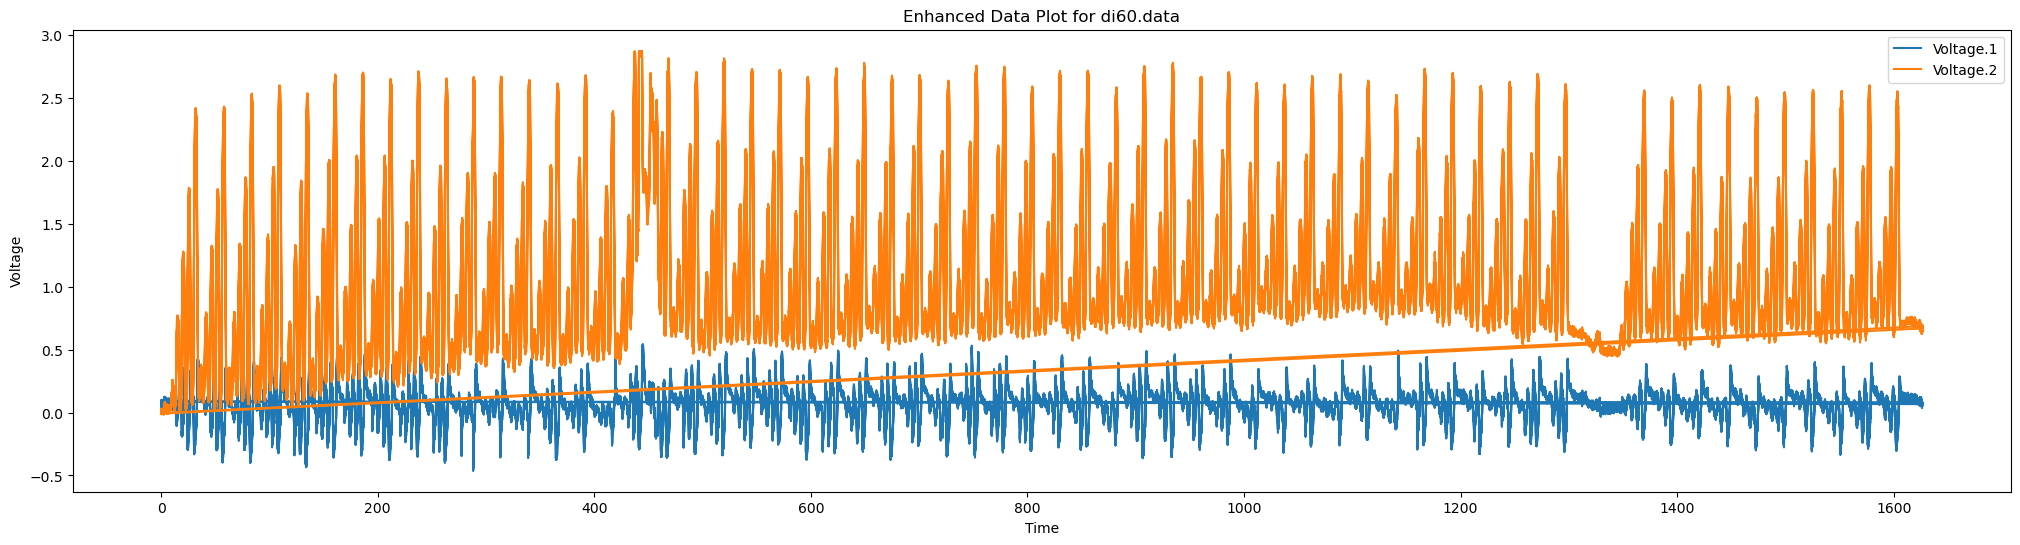

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: na50.data
增强后的数据形状: (40104, 4)


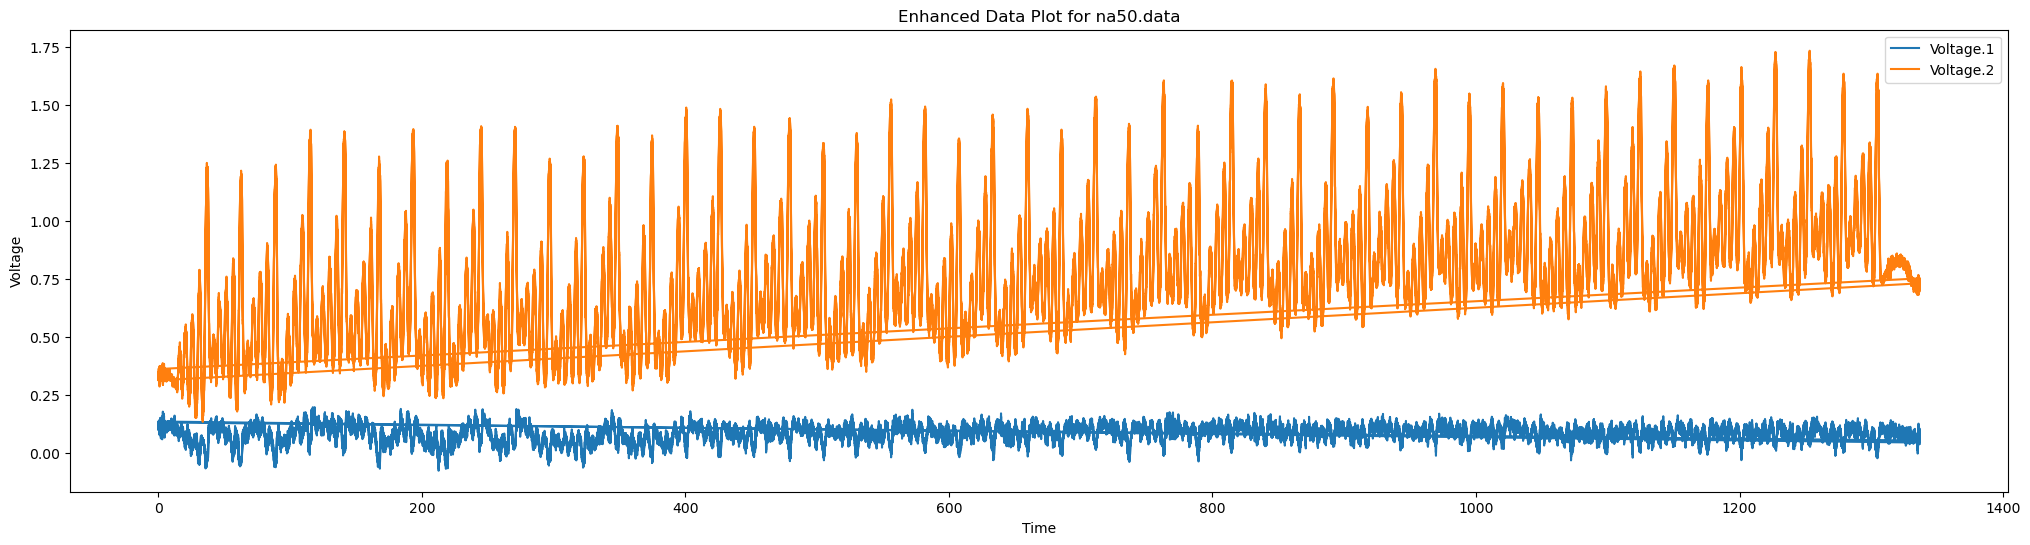

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: pb50.data
增强后的数据形状: (39882, 4)


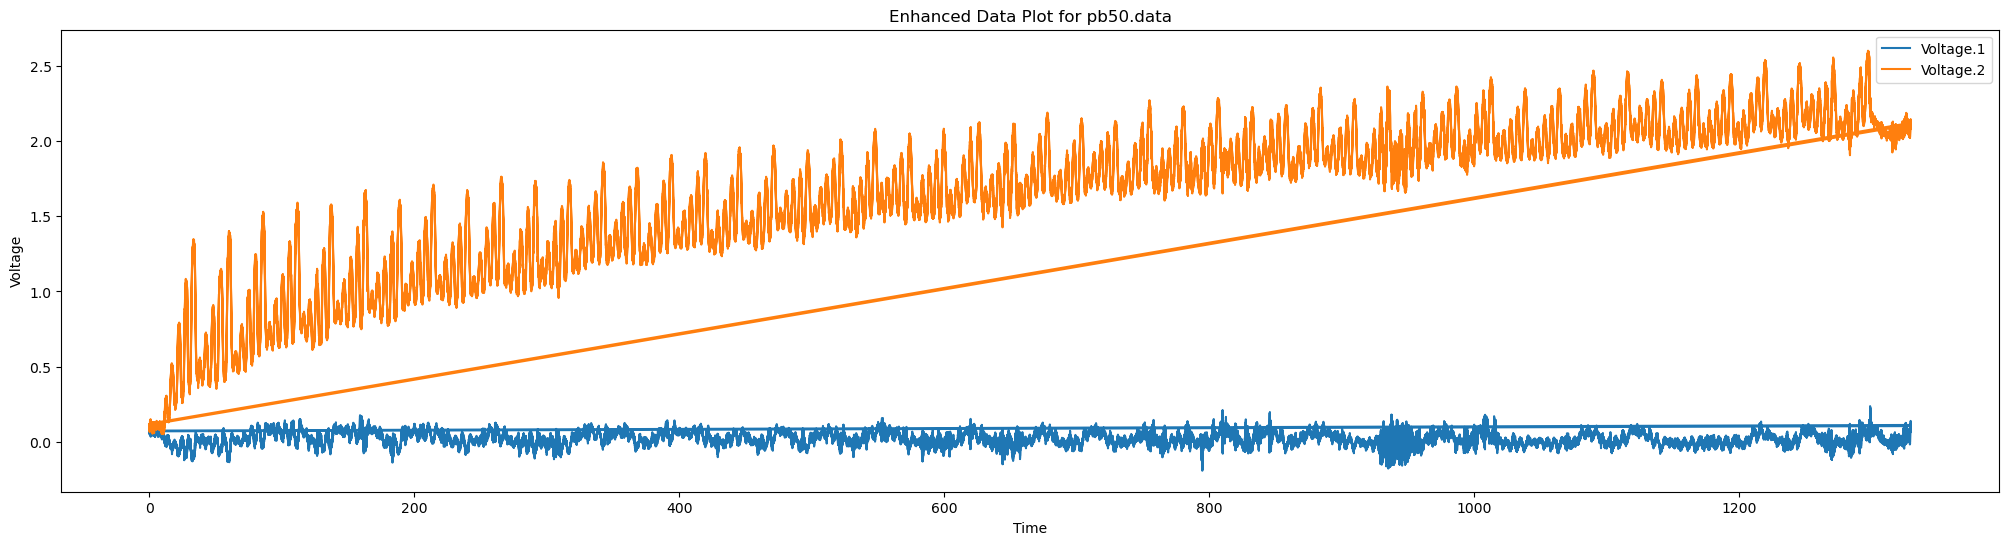

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: peg25.data
增强后的数据形状: (29742, 4)


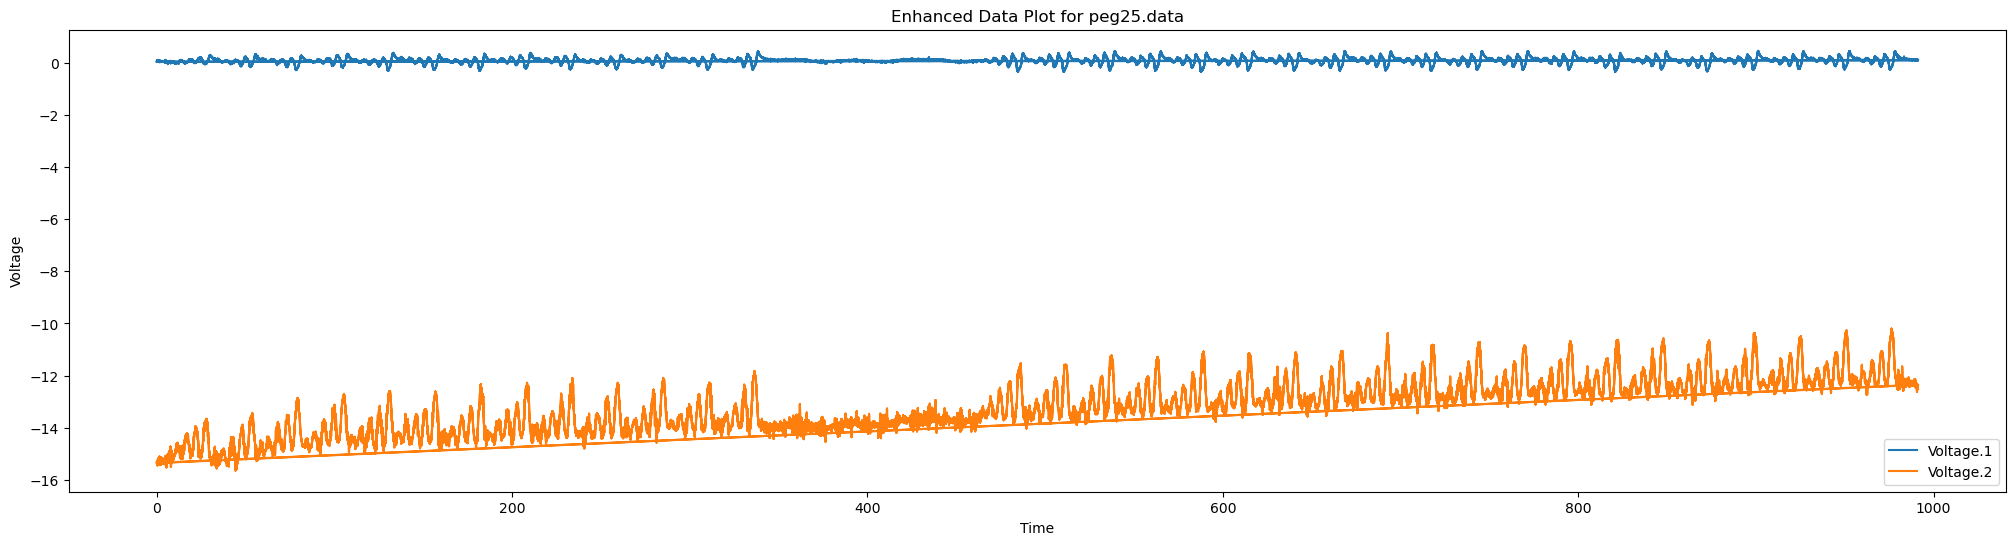

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: qipaoshui.data
增强后的数据形状: (43629, 4)


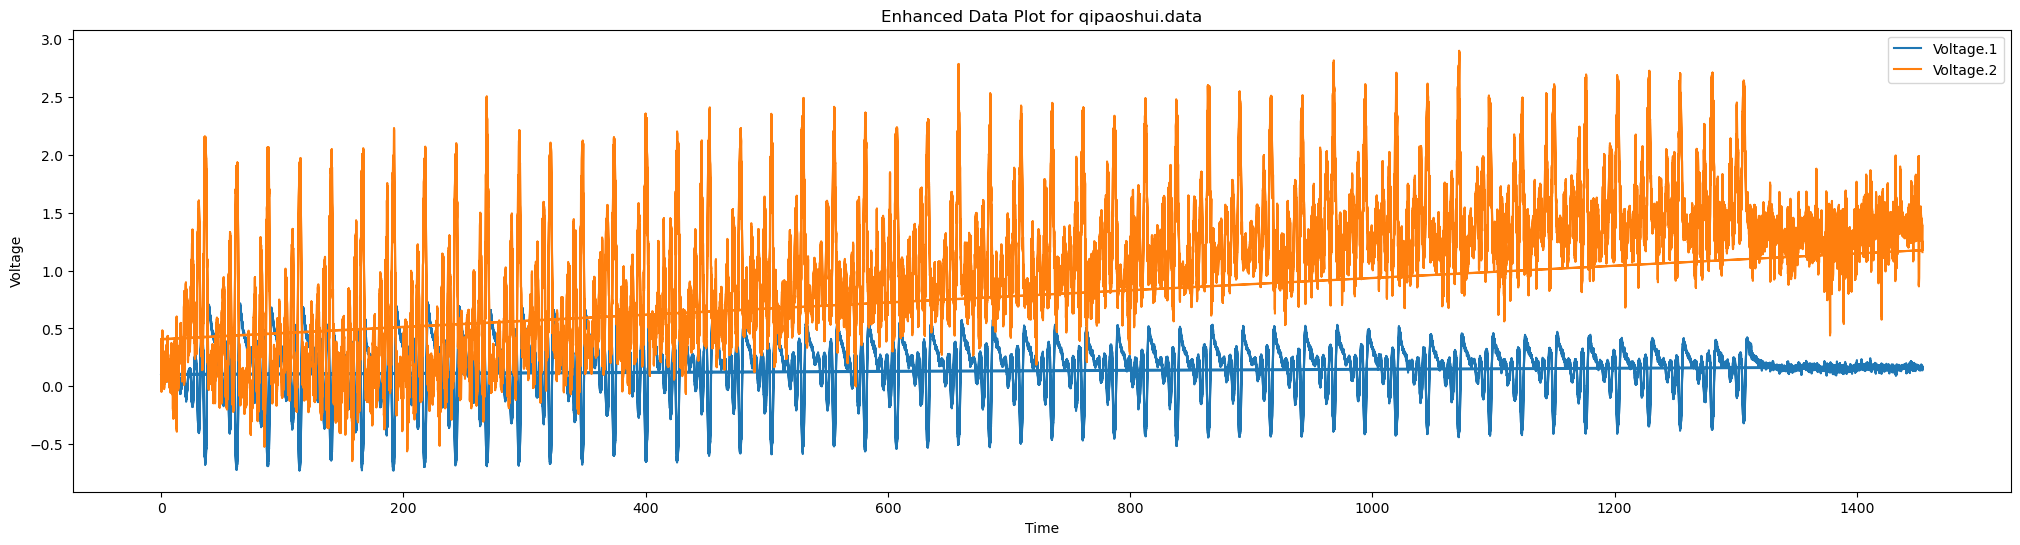

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


正在处理文件: tapwater.data
增强后的数据形状: (40929, 4)


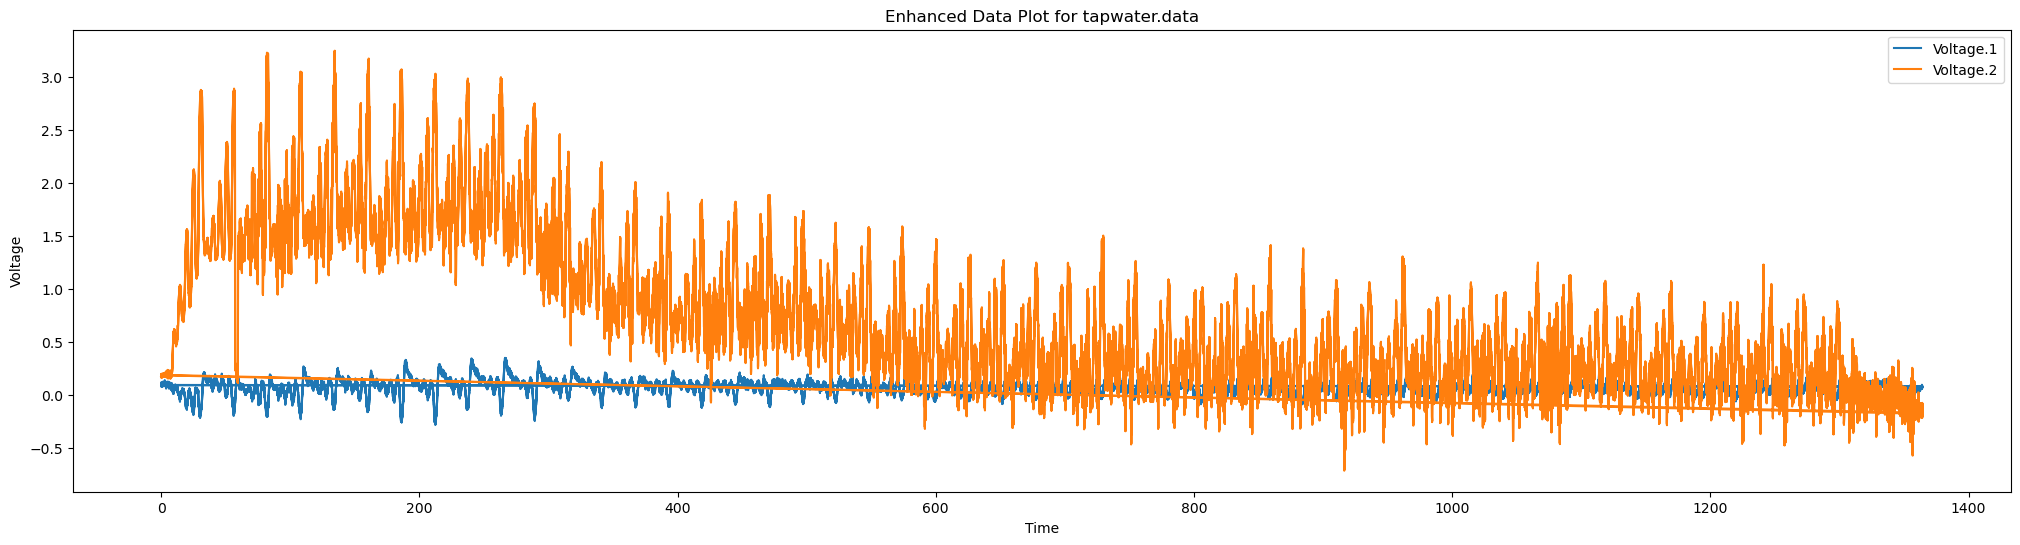

D:\Anadaconda\envs\gru\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


数据增强和分组完成，已保存到 'split_data3' 文件夹中。


In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    df = pd.read_csv(file_path, header=None, skiprows=8, delimiter='\t')
    
    df = df.iloc[:, 1:5]
    df.columns = ['Time1', 'Voltage.1', 'Time2', 'Voltage.2']
    
    df = df.apply(pd.to_numeric, errors='coerce')
    
    df = df.dropna(subset=['Voltage.1', 'Time2', 'Voltage.2'])
    
    if df.empty:
        print(f"wrong")
        return None
    
    return df


def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def augment_data(df, augment_factor=3):
    augmented_data = [df]
    for _ in range(augment_factor - 1):
        noisy_data = add_noise(df.values)
        augmented_data.append(pd.DataFrame(noisy_data, columns=df.columns))
    return pd.concat(augmented_data, ignore_index=True)

def split_data_into_groups(data, num_groups=50):
    split_data = np.array_split(data, num_groups)
    return split_data


def save_split_data(data_splits, file_prefix, parent_folder):
    sub_folder = os.path.join(parent_folder, file_prefix)
    os.makedirs(sub_folder, exist_ok=True)

    for i, data in enumerate(data_splits):
        file_path = os.path.join(sub_folder, f"{file_prefix}_{i+1}.csv")
        data.to_csv(file_path, index=False)

output_folder = "split_data3"  
os.makedirs(output_folder, exist_ok=True)

data_path = "D:\\桌面\\FYP\\Data" 
file_names = [f for f in os.listdir(data_path) if f.endswith('.data')]  # 只读取 .data 文件

for file_name in file_names:
    file_path = os.path.join(data_path, file_name)
    
    print(f"正在处理文件: {file_name}")
    df = load_data(file_path)
    
    if df is None:
        continue
    
    augmented_df = augment_data(df)
    print(f"增强后的数据形状: {augmented_df.shape}")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(25, 6))
    plt.plot(augmented_df['Time1'], augmented_df['Voltage.1'], label='Voltage.1')
    plt.plot(augmented_df['Time2'], augmented_df['Voltage.2'], label='Voltage.2')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title(f"Enhanced Data Plot for {file_name}")
    plt.legend()
    plt.show()
    
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(augmented_df)
    normalized_df = pd.DataFrame(normalized_data, columns=augmented_df.columns)
    
    split_data = split_data_into_groups(normalized_df)
    
    file_prefix = os.path.splitext(file_name)[0]
    
    save_split_data(split_data, file_prefix, output_folder)

print("数据增强和分组完成，已保存到 'split_data3' 文件夹中。")
